# Generational Shifts in Malaysia: A Look at Population Trends by Age and State.
This project will explore population data by age and state in Malaysia. The analysis can reveal trends in population growth, aging, and potential implications for social services and economic planning. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
# add more if required


In [2]:
# PopulationDataLoader class
class PopulationDataLoader:

    # Initializes the PopulationDataLoader with the URL of the Parquet file.
    def __init__(self, url):
        self.url = url
        self.df = None

    # Loads the population data from the specified URL into a pandas DataFrame.
    def load_data(self):  
        self.df = pd.read_parquet(self.url)
        return self.df
    
# PopulationDataAnalyzer class
class PopulationDataAnalyzer:
    def __init__(self, data_loader):
        self.data_loader = data_loader
        self.df = None

    # Loads the data using PopulationDataLoader and performs analysis. 
    # return a tuple containing the dataframe description and rows with missing population values.
    def load_and_analyze(self):
        self.df = self.data_loader.load_data()
        description = self.df.describe()
        missing_population = self.df[self.df["population"].isna()]
        
        return description, missing_population
    
    # Displays the first n rows of the DataFrame.
    def display_head(self, n=5):
        if self.df is None:
            self.df = self.data_loader.load_data()
        return self.df.head(n)
    
    def display_tail(self, n=5):
        if self.df is None:
            self.df = self.data_loader.load_data()
        return self.df.tail(n)
    
    # Processes the population data to generate aggregated information by state.
    def process_population_data(self):
        if self.df is None:
            self.df = self.data_loader.load_data()
        
        grp_state = self.df.groupby("state")

        population_list = []

        for grp, grp_info in grp_state:
            state_dict = {}
            
            state_dict["state"] = grp
            state_dict["ethnicity_count"] = grp_info["ethnicity"].nunique()
            state_dict["population_sum"] = grp_info["population"].sum()
            state_dict["unique_age_groups"] = grp_info["age"].nunique()
            state_dict["sex_count"] = grp_info["sex"].nunique()
            state_dict["min_date"] = grp_info["date"].min()
            state_dict["max_date"] = grp_info["date"].max()
            
            population_list.append(state_dict)

        df_processed = pd.DataFrame(population_list)
        return df_processed
    
    # Saves the given DataFrame to a CSV file.
    def save_to_csv(self, df, filename):
        df.to_csv(filename, index=False)
        print(f"Data saved to {filename}")

    # Plots the population trends using the processed DataFrame.
    def plot_population_trends(self, df):
        df.sort_values('population_sum', ascending=False).plot(kind='bar', x='state', y='population_sum', legend=True)
        plt.title('Total Population by State')
        plt.xlabel('State')
        plt.ylabel('Total Population')
        plt.show()

    #Calculates and returns the mean and median of the population sums.
    def calculate_population_statistics(self, df):
        mean_population = df['population_sum'].mean()
        median_population = df['population_sum'].median()
        return mean_population, median_population
    
    # Plots the ethnicity distribution by state.
    def plot_ethnicity_distribution(self):
        if self.df is None:
            self.df = self.data_loader.load_data()
    
        ethnicity_distribution = self.df.groupby(['state', 'ethnicity'])['population'].sum().unstack().fillna(0)
        
        ethnicity_distribution.plot(kind='bar', stacked=True, figsize=(14, 8))
        plt.title('Ethnicity Distribution by State')
        plt.xlabel('State')
        plt.ylabel('Total Population')
        plt.legend(title='Ethnicity', bbox_to_anchor=(1,1))
        plt.tight_layout()
        plt.show()

    # Plots the gender distribution by state, excluding the 'both' category.
    def plot_gender_distribution(self):
        if self.df is None:
            self.df = self.data_loader.load_data()
        
        # Exclude rows where sex is 'both'
        df_exclude_both = self.df[self.df['sex'] != 'both']
        
        # Group by state and sex to calculate population by gender
        gender_distribution = df_exclude_both.groupby(['state', 'sex'])['population'].sum().unstack().fillna(0)
        
        # Plot gender distribution for each state
        gender_distribution.plot(kind='bar', figsize=(10, 8))
        plt.title('Gender Distribution by State')
        plt.xlabel('State')
        plt.ylabel('Total Population')
        plt.legend(title='Gender')
        plt.tight_layout()
        plt.show()

    # Plots the age group distribution by state, excluding the 'overall' category.
    def plot_age_distribution(self):
        if self.df is None:
            self.df = self.data_loader.load_data()
        
        # Exclude rows where age is 'overall'
        df_exclude_overall = self.df[self.df['age'] != 'overall']
        
        # Group by state and age to calculate population by age group
        age_distribution = df_exclude_overall.groupby(['state', 'age'])['population'].sum().unstack().fillna(0)
        
        # Plot age group distribution for each state
        age_distribution.plot(kind='bar', stacked=True, figsize=(14, 8))
        plt.title('Age Group Distribution by State')
        plt.xlabel('State')
        plt.ylabel('Total Population')
        plt.legend(title='Age Group')
        plt.tight_layout()
        plt.show()

    #Plots the population distribution by state and sex using a strip plot, excluding the 'both' category.
    def plot_population_by_state_and_sex(self):
        if self.df is None:
            self.df = self.data_loader.load_data()

        # Exclude rows where sex is 'both'
        df_filtered = self.df[self.df['sex'] != 'both']

        # Plot population distribution by state and sex
        sns.catplot(x="state", y="population", hue="sex", kind="strip", data=df_filtered, height=10, aspect=2)
        plt.title('Population Distribution by State and Sex')
        plt.xlabel('State')
        plt.ylabel('Population')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()


In [3]:
# Usage example
URL = "https://storage.dosm.gov.my/population/population_state.parquet"
loader = PopulationDataLoader(URL)
analyzer = PopulationDataAnalyzer(loader)

### Load all data and analyse data

In [4]:
df = loader.load_data()
df

,state,date,sex,age,ethnicity,population
0,Johor,0,both,overall,overall,1325.6
1,Johor,0,both,0-4,overall,210.1
2,Johor,0,both,5-9,overall,215.7
3,Johor,0,both,10-14,overall,192.2
4,Johor,0,both,15-19,overall,152.8
...,...,...,...,...,...,...
257290,W.P. Putrajaya,1704067200000000000,male,85+,bumi_other,0.0
257291,W.P. Putrajaya,1704067200000000000,male,85+,chinese,0.0
257292,W.P. Putrajaya,1704067200000000000,male,85+,indian,0.0
257293,W.P. Putrajaya,1704067200000000000,male,85+,other_citizen,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257295 entries, 0 to 257294
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   state       257295 non-null  object 
 1   date        257295 non-null  object 
 2   sex         257295 non-null  object 
 3   age         257295 non-null  object 
 4   ethnicity   257295 non-null  object 
 5   population  257295 non-null  float64
dtypes: float64(1), object(5)
memory usage: 11.8+ MB


There is no missing value from the dataset

In [6]:
description, missing_population = analyzer.load_and_analyze()
description

,population
count,257295.000000
mean,35.859336
std,155.745595
min,0.000000
25%,0.300000
50%,3.300000
75%,21.900000
max,7363.400000


In [7]:
missing_population

,state,date,sex,age,ethnicity,population


In [8]:
print("First 5 Rows of the DataFrame:")
analyzer.display_head()

First 5 Rows of the DataFrame:


,state,date,sex,age,ethnicity,population
0,Johor,0,both,overall,overall,1325.6
1,Johor,0,both,0-4,overall,210.1
2,Johor,0,both,5-9,overall,215.7
3,Johor,0,both,10-14,overall,192.2
4,Johor,0,both,15-19,overall,152.8


In [9]:
print("Last 5 Rows of the DataFrame:")
analyzer.display_tail()

Last 5 Rows of the DataFrame:


,state,date,sex,age,ethnicity,population
257290,W.P. Putrajaya,1704067200000000000,male,85+,bumi_other,0.0
257291,W.P. Putrajaya,1704067200000000000,male,85+,chinese,0.0
257292,W.P. Putrajaya,1704067200000000000,male,85+,indian,0.0
257293,W.P. Putrajaya,1704067200000000000,male,85+,other_citizen,0.0
257294,W.P. Putrajaya,1704067200000000000,male,85+,other_noncitizen,0.0


In [10]:
df_processed = analyzer.process_population_data()
print("Processed Population Data:")
df_processed

Processed Population Data:


,state,ethnicity_count,population_sum,unique_age_groups,sex_count,min_date,max_date
0,Johor,9,1091988.0,21,3,0,1704067200000000000
1,Kedah,9,655399.7,21,3,0,1704067200000000000
2,Kelantan,9,545676.0,21,3,0,1704067200000000000
3,Melaka,9,272974.4,21,3,0,1704067200000000000
4,Negeri Sembilan,9,344915.1,21,3,0,1704067200000000000
5,Pahang,9,495157.8,21,3,0,1704067200000000000
6,Perak,9,860341.1,21,3,0,1704067200000000000
7,Perlis,9,83258.1,21,3,0,1704067200000000000
8,Pulau Pinang,9,534835.8,21,3,0,1704067200000000000
9,Sabah,9,976234.8,21,3,0,1704067200000000000


In [11]:
# Save the processed data to a CSV file
analyzer.save_to_csv(df_processed, 'processed_population_data.csv')

Data saved to processed_population_data.csv


In [12]:
mean_population, median_population = analyzer.calculate_population_statistics(df_processed)
print(f"Mean Population: {mean_population}")
print(f"Median Population: {median_population}")

Mean Population: 576651.7375
Median Population: 534850.95


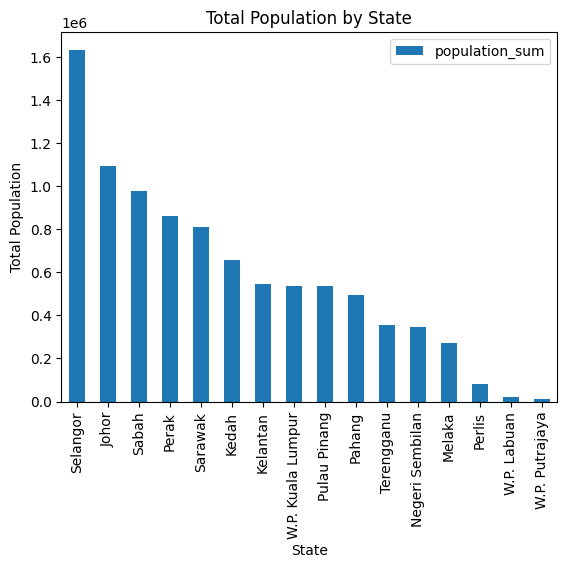

In [14]:
analyzer.plot_population_trends(df_processed)

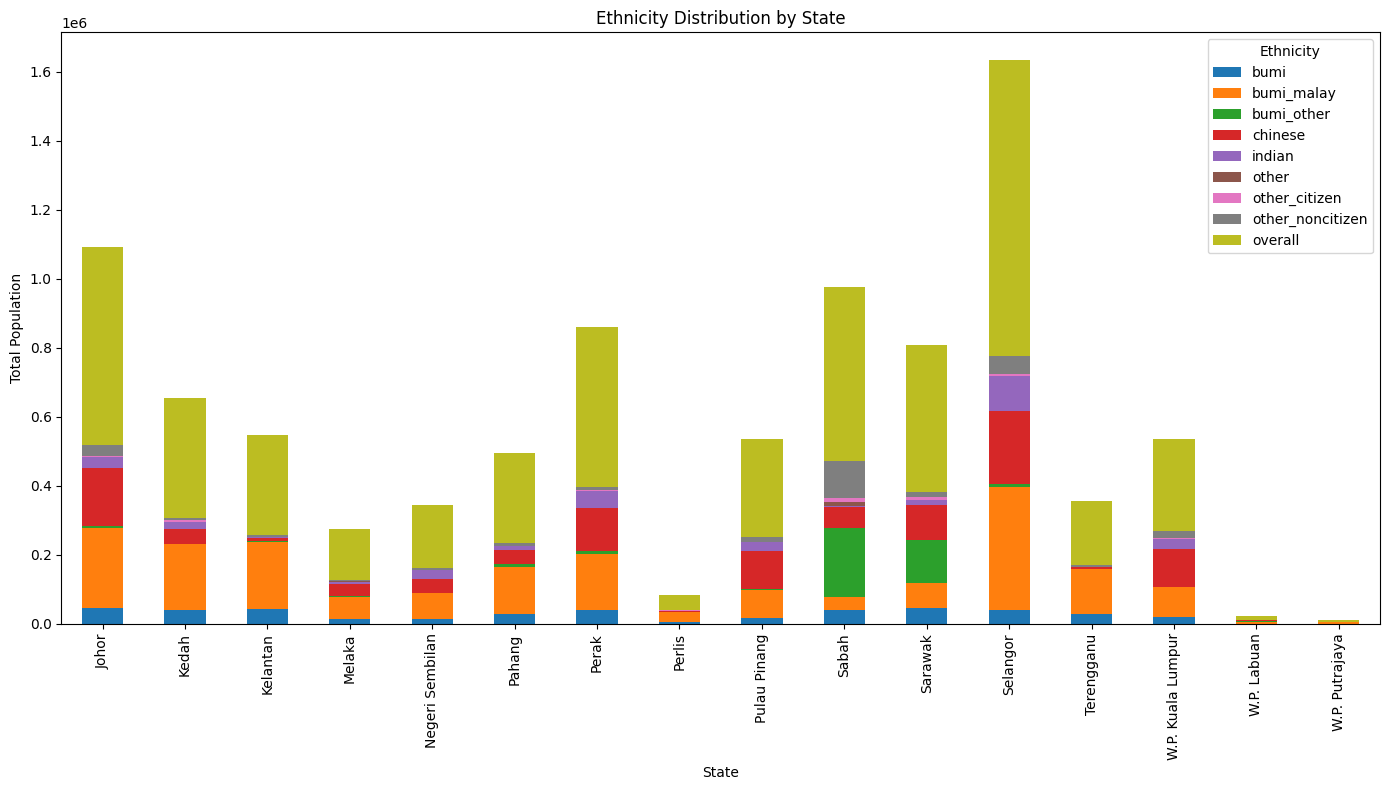

In [ ]:
# Plot the ethnicity distribution
analyzer.plot_ethnicity_distribution()

This bar chart shows the ethnic distribution of each state and federal territory in Malaysia, showing the population composition of different ethnic groups, such as Bumiputera (Malays, Others), Chinese, Indians, etc. Each bar represents a state or federal territory, and the height of the bar reflects the total population of the area. 

The population is divided into different ethnic groups, and each ethnic group is represented by a specific color.

Selangor and Johor have the largest populations, and these two states also have a large number of Bumiputera Malays. The largest number of Bumiputera Others is in Sabah and Sarawak. 

This chart effectively highlights the population differences across the country.

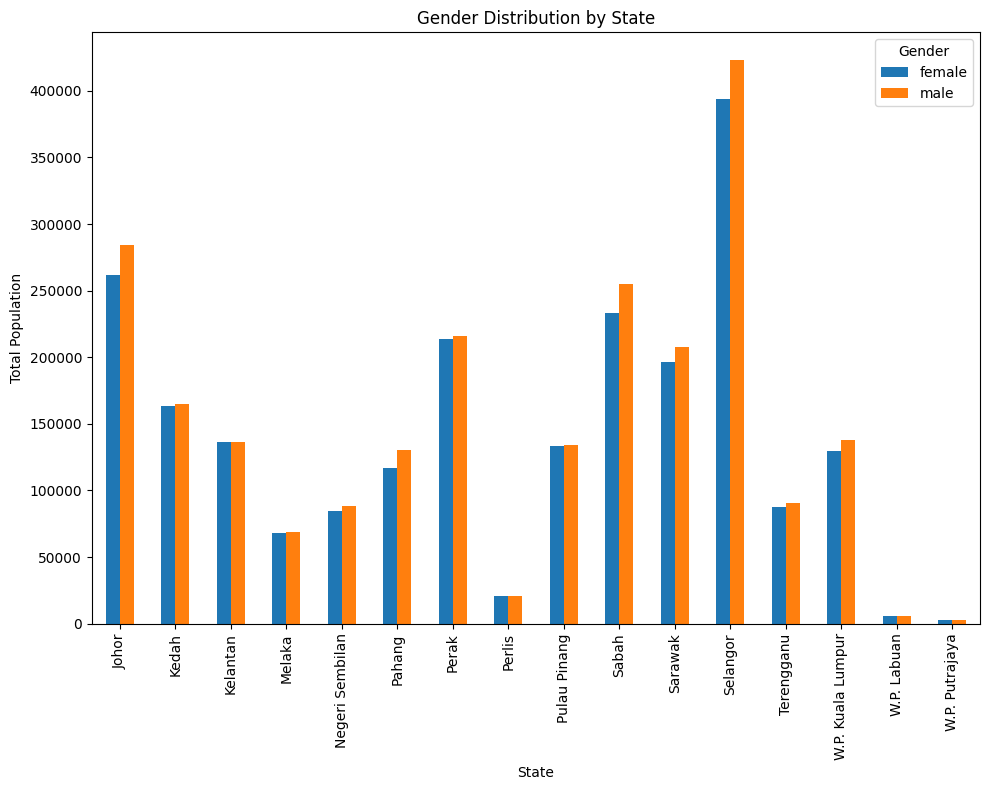

In [ ]:
# Plot the gender distribution
analyzer.plot_gender_distribution()

This bar chart shows the Gender Distribution by State across various states and federal territories in Malaysia.

Each state or federal territory is represented by a pair of bars: one for the female population (blue) and one for the male population (orange).

Selangor and Johor, the states with the largest populations, have a higher proportion of males than females.

Sabah and Sarawak also have a considerable population, with males again slightly outnumbering females.

Kedah, Kelantan, Melaka, Perlis, Pulau Pinang, Labuan, and Putrajaya have almost equal male and female populations.

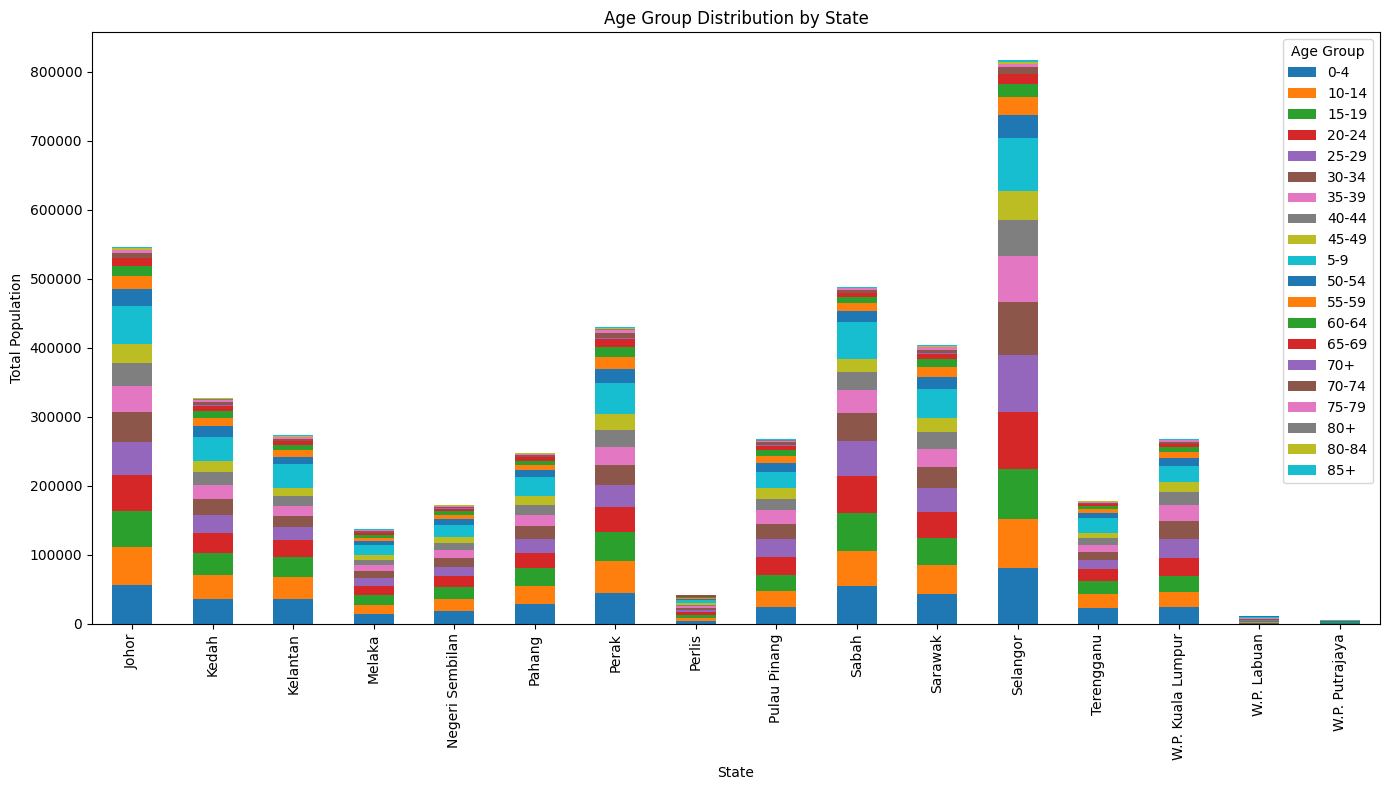

In [ ]:
# Plot the age group distribution
analyzer.plot_age_distribution()

This bar chart shows the Age Group Distribution by State across various states and federal territories in Malaysia. Each bar represents a state or federal territory, and the height of the bar indicates the total population within that region. The chart categorizes the population into multiple age groups, ranging from 0-4 years to 85+ years. 

Each age group represented by a specific color, making it easy to see the distribution across different states.

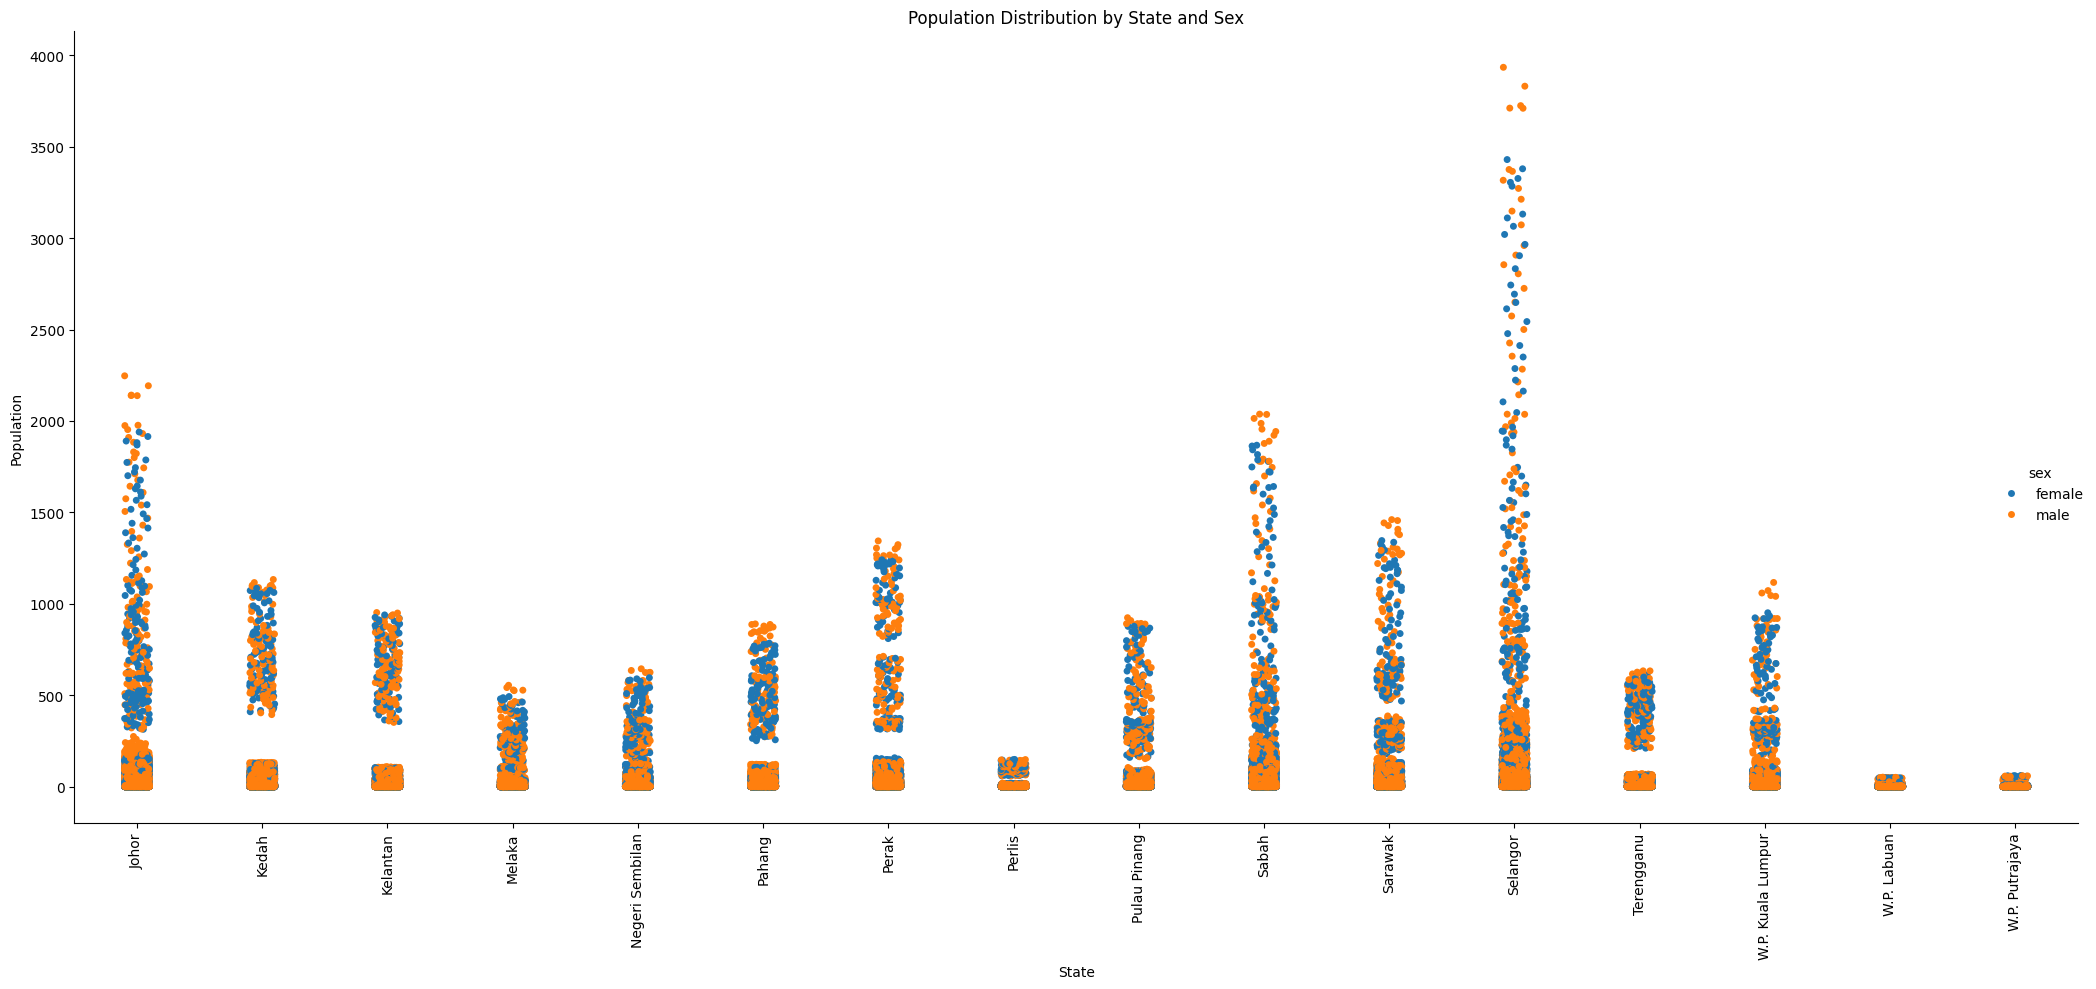

In [ ]:
# Plot the population distribution by state and sex
analyzer.plot_population_by_state_and_sex()